**Sentiment analysis is a natural language processing (NLP) approach used to evaluate whether the data have a positive, negative, or neutral sentiment. Sentiment analysis is frequently done on text data to assist organizations in tracking the sentiment of brands and products in consumer feedback and understanding customer demands. It has also been recently used in the political context, to evaluate the voters reaction to parties declarations.
 Other classification tasks where sentiment analysis have been employed are twitter posts and movies and products reviews sentiment classification.**

**In this tutorial, we will use a Keras model along with the UCI Sentiment Labelled Sentences Data Set, to evaluate the sentiment of some sentences. This dataset represents 1000 sentences along with it's corresponding sentiment label (1 being positive sentiment and 0 representing a negative sentiment).**

**we will use pandas to read the data, and NLTK to tokenize and then lemmatize all the sentences. After that, we will split the dataset into training and testing sets, with a test set taking 25% of the dataset size.**

**For each sentence, we will transform it to lowercase then tokenize each sentence, and lemmatize each token of the sentences using the WordNetLemmatizer. When dealing with classification tasks, it has been demonstrated that the lemmatization process performs much better than stemming.**


**Finally, the set of altered sentences will then be vectorized.  The scikit-learn module in Python offers an excellent tool called countVectorizer. It is used to convert a given text into a vector based on the number of times that each word appears across the text.**

In [1]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.wordnet import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
data = pd.read_csv("/content/amazon_cells_labelled.txt", names=['sentence', 'label'], sep='\t')

In [3]:
data

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [4]:
sentences = data['sentence'].values
sentences

array(['So there is no way for me to plug it in here in the US unless I go by a converter.',
       'Good case, Excellent value.', 'Great for the jawbone.',
       'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
       'The mic is great.',
       'I have to jiggle the plug to get it to line up right to get decent volume.',
       'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
       'If you are Razr owner...you must have this!',
       'Needless to say, I wasted my money.',
       'What a waste of money and time!.',
       'And the sound quality is great.',
       'He was very impressed when going from the original battery to the extended battery.',
       'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.',
       'Very good quality though',
       'The design is very odd, as the ear "clip" is not very comfortable at al

In [5]:
len(sentences)

1000

In [6]:
y = data['label'].values
y.shape

(1000,)

In [7]:
wordnet=WordNetLemmatizer()

In [8]:
data['sentence'][0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [9]:
corpus = []
for i in range(0, len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ',data['sentence'][i])

    review = review.lower()
    review = review.split()

    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


In [10]:
corpus

['way plug u unless go converter',
 'good case excellent value',
 'great jawbone',
 'tied charger conversation lasting minute major problem',
 'mic great',
 'jiggle plug get line right get decent volume',
 'several dozen several hundred contact imagine fun sending one one',
 'razr owner must',
 'needle say wasted money',
 'waste money time',
 'sound quality great',
 'impressed going original battery extended battery',
 'two seperated mere ft started notice excessive static garbled sound headset',
 'good quality though',
 'design odd ear clip comfortable',
 'highly recommend one blue tooth phone',
 'advise everyone fooled',
 'far good',
 'work great',
 'click place way make wonder long mechanism would last',
 'went motorola website followed direction could get pair',
 'bought use kindle fire absolutely loved',
 'commercial misleading',
 'yet run new battery two bar three day without charging',
 'bought mother problem battery',
 'great pocket pc phone combination',
 'owned phone month sa

In [11]:
sentences_train, sentences_test, y_train, y_test = train_test_split(corpus, y, test_size=0.25, random_state=1000)

In [12]:
#Bag of words
vectorizer = CountVectorizer()
# try with TF-IDF



In [13]:
vectorizer.fit(sentences_train)

CountVectorizer()

In [14]:
X_train = vectorizer.transform(sentences_train)
X_train

<750x1291 sparse matrix of type '<class 'numpy.int64'>'
	with 3774 stored elements in Compressed Sparse Row format>

In [15]:
X_test  = vectorizer.transform(sentences_test)
X_test

<250x1291 sparse matrix of type '<class 'numpy.int64'>'
	with 1013 stored elements in Compressed Sparse Row format>

**Using the Vectorizer, we can create inputs with same sizes for different shape of phrases.Next, we'll create a Keras sequential model using the input dimension equal to the size of the vectorized sentences.**

In [16]:
from keras.models import Sequential
from keras import layers

In [17]:
X_train

<750x1291 sparse matrix of type '<class 'numpy.int64'>'
	with 3774 stored elements in Compressed Sparse Row format>

In [18]:
input_dim = X_train.shape[1]

In [19]:
input_dim

1291

In [20]:
model = Sequential()

In [21]:

model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                12920     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 12931 (50.51 KB)
Trainable params: 12931 (50.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model

**Then we will train the model on the dataset created previously**

In [24]:
history = model.fit(X_train, y_train,epochs=100,validation_data=(X_test, y_test),batch_size=10)
history



Epoch 1/100
75/75 [==============================] - 2s 6ms/step - loss: 0.6866 - accuracy: 0.5360 - val_loss: 0.6720 - val_accuracy: 0.6080
Epoch 2/100
75/75 [==============================] - 0s 4ms/step - loss: 0.6367 - accuracy: 0.7560 - val_loss: 0.6371 - val_accuracy: 0.7000
Epoch 3/100
75/75 [==============================] - 0s 4ms/step - loss: 0.5632 - accuracy: 0.8867 - val_loss: 0.5897 - val_accuracy: 0.7320
Epoch 4/100
75/75 [==============================] - 0s 3ms/step - loss: 0.4718 - accuracy: 0.9333 - val_loss: 0.5444 - val_accuracy: 0.7560
Epoch 5/100
75/75 [==============================] - 0s 3ms/step - loss: 0.3853 - accuracy: 0.9493 - val_loss: 0.5100 - val_accuracy: 0.7520
Epoch 6/100
75/75 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.9613 - val_loss: 0.4856 - val_accuracy: 0.7640
Epoch 7/100
75/75 [==============================] - 0s 3ms/step - loss: 0.2589 - accuracy: 0.9693 - val_loss: 0.4718 - val_accuracy: 0.7600
Epoch 8/100
7

**For the accuracy and loss plots:**

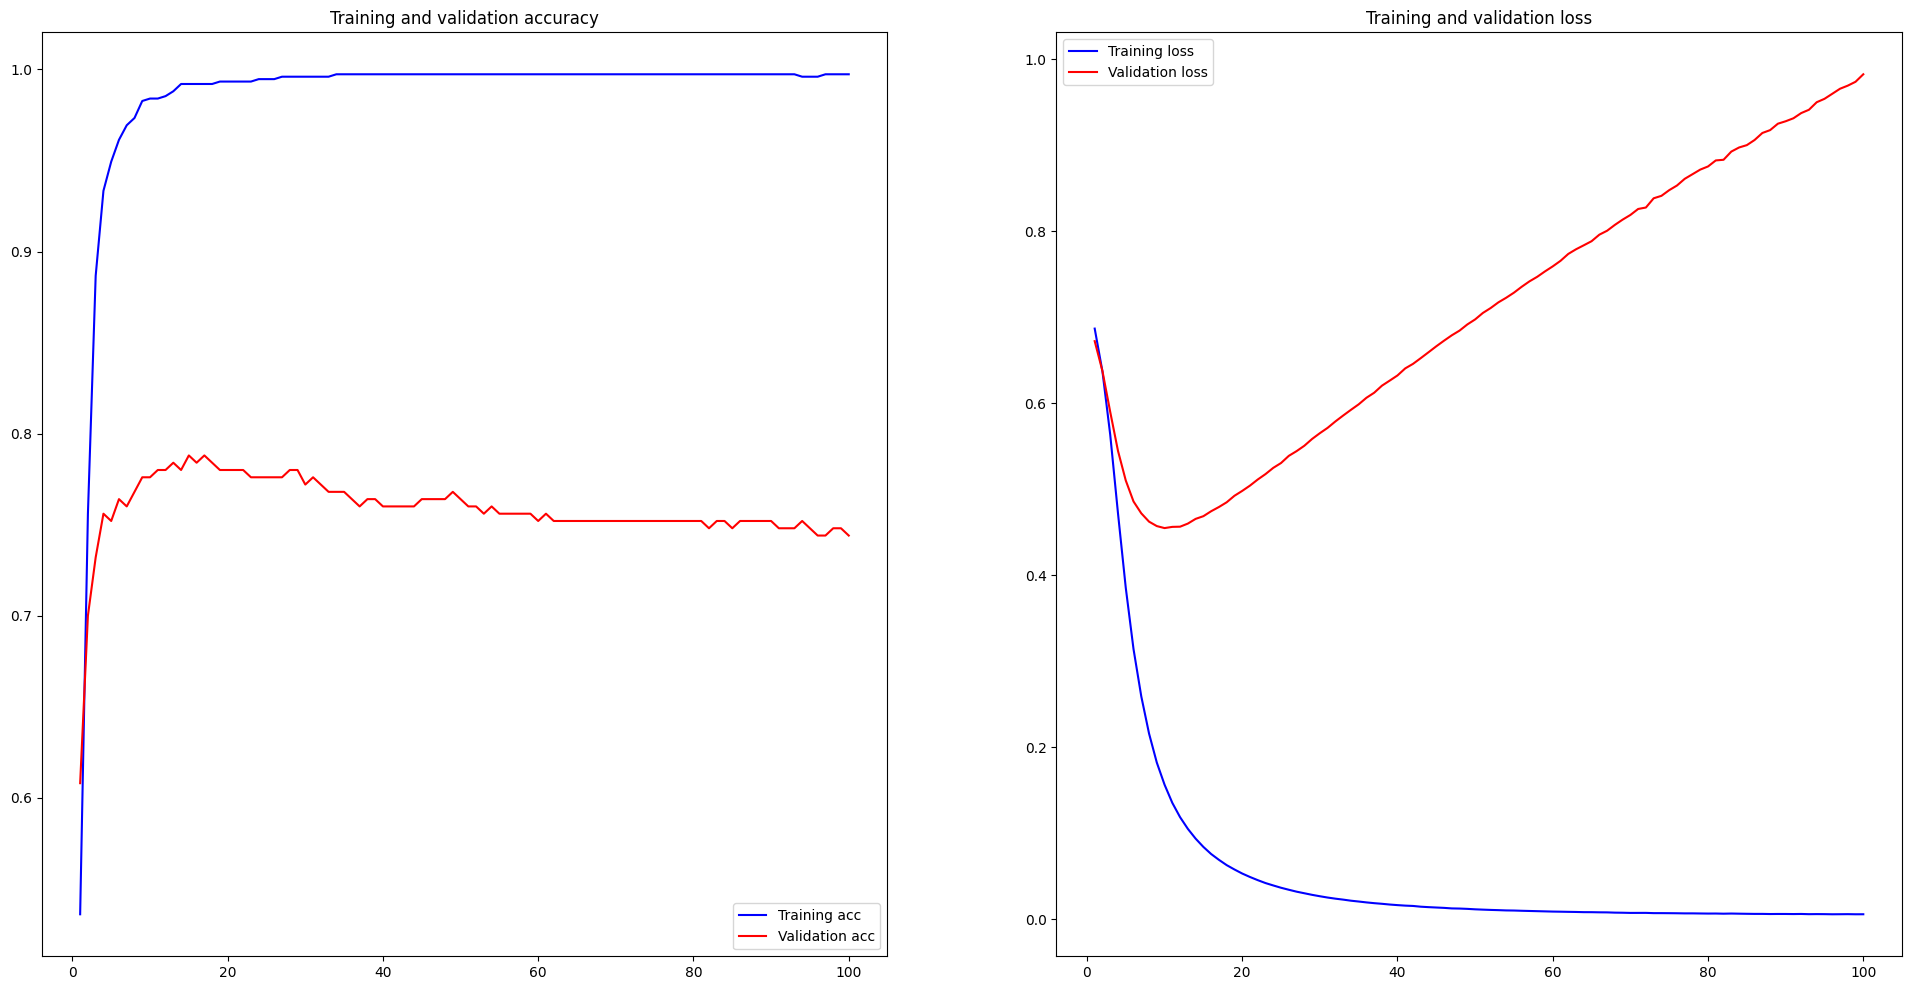

In [25]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(acc) + 1), acc, 'b', label='Training acc')
plt.plot(range(1, len(acc) + 1), val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(1, len(acc) + 1), loss, 'b', label='Training loss')
plt.plot(range(1, len(acc) + 1), val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

**Using this model, we achieved a sentiment analysis accuracy of 74%**

**Then using this trained model, we performed tests on a set of 3 new sentences, two of which are clearly considered to have a positive sentiment, while the third have a negative sentiment.**

In [26]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.7440


In [27]:
sentences = ["AI is growing at an amazing pace","paperspace is one of the best cloud computing service providers",
             "Using local GPU AI machines is a bad idea"]

In [28]:
sentences = [ nltk.word_tokenize(sentence.lower()) for sentence in sentences]

In [29]:
sentences

[['ai', 'is', 'growing', 'at', 'an', 'amazing', 'pace'],
 ['paperspace',
  'is',
  'one',
  'of',
  'the',
  'best',
  'cloud',
  'computing',
  'service',
  'providers'],
 ['using', 'local', 'gpu', 'ai', 'machines', 'is', 'a', 'bad', 'idea']]

In [30]:
wordnet_lemmatizer = WordNetLemmatizer()

In [31]:
sentences = [ " ".join([wordnet_lemmatizer.lemmatize(token) for token in sentence_tokens]) for sentence_tokens in sentences]
sentences

['ai is growing at an amazing pace',
 'paperspace is one of the best cloud computing service provider',
 'using local gpu ai machine is a bad idea']

In [32]:
sentences = ["AI is growing at an amazing pace","paperspace is one of the best cloud computing service providers",
             "Using local GPU AI machines is a bad idea"]
sentences = [ nltk.word_tokenize(sentence.lower()) for sentence in sentences]
wordnet_lemmatizer = WordNetLemmatizer()
sentences = [ " ".join([wordnet_lemmatizer.lemmatize(token) for token in sentence_tokens]) for sentence_tokens in sentences]
sentences


['ai is growing at an amazing pace',
 'paperspace is one of the best cloud computing service provider',
 'using local gpu ai machine is a bad idea']

In [33]:
vectorizer.transform(sentences)

<3x1291 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [34]:
X_predict = vectorizer.transform(sentences)
predictions = model.predict(X_predict)

1/1 [==============================] - 0s 157ms/step


In [35]:
predictions

array([[5.8505267e-01],
       [9.9912107e-01],
       [2.8734175e-05]], dtype=float32)

In [36]:
len(sentences)

3

In [37]:
predictions_1 = [ (y[0] > 0.5) for y in predictions]

In [38]:
predictions_1

[True, True, False]

In [39]:
predictions_1 = [ (y[0] > 0.5) for y in predictions]
for i in range(0,len(sentences)):
  if predictions_1[i]==True:
    print("Positive sentiment : " + sentences[i])
  else:
    print("Negative sentiment : " + sentences[i])

Positive sentiment : ai is growing at an amazing pace
Positive sentiment : paperspace is one of the best cloud computing service provider
Negative sentiment : using local gpu ai machine is a bad idea
